In [1]:
# 데이터처리
from __future__ import print_function
import numpy as np
import pandas as pd
from IPython.display import display, HTML
# 머신러닝 알고리즘 및 평가
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab
import scipy as sp
import sklearn.preprocessing as preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
##### Data Load
dat_dir = 'C:/kdev/pythonCode/day2/'
dat = pd.read_csv(dat_dir+'Regression_3_abalone.csv')
display(HTML(dat.to_html()))


In [5]:
##### Data Preprocessing
# split x variable to y variable
x,y = dat.drop(['Y'], axis=1), dat['Y']

In [6]:
# split train to test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2923, 7) (1254, 7) (2923,) (1254,)


In [7]:
# Training the Multivariate Linear Regression Model
lm = sm.OLS(y_train, X_train)
lm_trained = lm.fit()
lm_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     8866.
Date:                Tue, 11 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:44:50   Log-Likelihood:                -6456.0
No. Observations:                2923   AIC:                         1.293e+04
Df Residuals:                    2916   BIC:                         1.297e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Length             5.0016      2.018      2.478      0.013       1.044       8.959
Diameter           9.6070      2.673      3.594      0.000       4.365      14.849
Height            30.9671      2.639     11.734      0.000      25.792      36.142
Whole_weight       8.4171      0.887      9.492      0.000       6.678      10.156
Shucked_weight   -20.3371      1.005    -20.243      0.000     -22.307     -18.367
Viscera_weight   -11.2130      1.537     -7.294      0.000     -14.227      -8.199
Shell_weight       5.7619      1.371      4.203      0.000       3.074       8.450
==============================================================================
Omnibus:                      569.792   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1341.456
Skew:                           1.085   Prob(JB):                    5.09e-292
Kurtosis:                       5.511   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

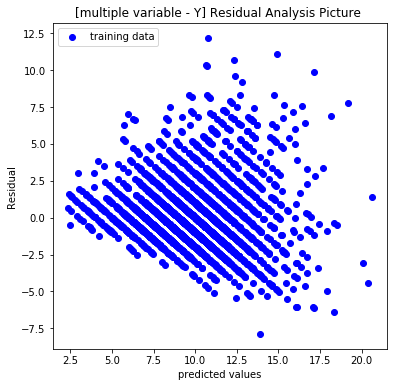

In [8]:
# Check the Model Assumption: residual by scatter plot
plt.figure(figsize=(6,6))
plt.scatter(lm_trained.fittedvalues, lm_trained.resid , c = 'blue', marker = 'o', label = 'training data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.title('[multiple variable - Y] Residual Analysis Picture ')
plt.legend(loc=2)
plt.show()


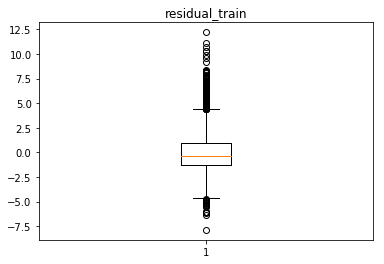

In [9]:
# Check the Model Assumption: residual by boxplot
plt.figure()
plt.boxplot(lm_trained.resid)
plt.title('residual_train')
plt.show()

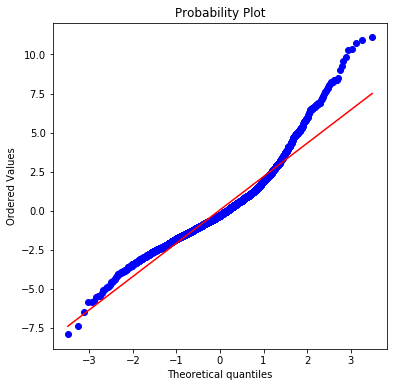

In [8]:
# Check the Model Assumption: normal distribution
plt.figure(figsize=(6,6))
stats.probplot(lm_trained.resid, dist='norm', plot=pylab)
pylab.show()

In [10]:
# prediction y_train
y_pred_train = lm_trained.predict(X_train)
y_pred_train

1116     8.664657
3944     5.479228
1845    12.184102
1209     8.498637
685     11.298465
545     16.003333
2759    16.745637
2635    10.609074
692     12.080498
1238    11.044345
3201    11.395868
3475    14.151520
1262     7.533362
1507     9.380198
1940     8.622036
806      9.585284
1879    10.805152
1681    10.071866
3902     7.785983
976      8.931688
2846     6.373749
1306     8.192694
2216    10.045156
915     10.108280
1567     9.762364
1705    12.988307
686      9.541538
329      8.057348
317      8.373641
1600     9.596505
          ...    
653     10.184578
644     10.691565
3397     9.782843
1614    15.300652
3031     5.625784
3819     8.489644
658      6.619003
1844     9.436343
1800     9.627566
1339    15.441529
1086     9.590386
3869     5.869492
2950     9.190529
2813     7.852567
1489     8.751220
3571    11.125703
1553    10.179730
4099    16.738514
1508     8.044674
637      8.805825
880      8.760088
3550     9.275180
3977    18.128426
926      9.228387
3743     5

In [11]:
# prediction y_test
y_pred_test = lm_trained.predict(X_test)
y_pred_test

420     10.251791
4131    10.652365
2689     3.367511
607     12.384703
878     11.842573
2484     6.242308
3934     8.756854
1366     9.328258
58      10.346198
3658    12.437550
1354     9.674540
2629     9.014128
1239     8.934894
3856     4.920130
911     11.029932
3138    14.057076
2610    11.924574
2391     8.132128
3826     8.078505
4128     5.360002
1470    12.205611
3802     7.968796
1435     4.997098
2245     8.282627
1959     8.216294
1785     9.158949
1627     9.014730
3225     7.830566
3369    10.002135
1774    10.309575
          ...    
383      8.547258
1655     6.651310
2878     5.193153
2719    13.883117
854     10.218531
2220     9.594880
3592    18.616589
13       9.153761
2393    12.118611
2247     4.924791
1741    14.245339
2323    10.355288
82       5.367271
294      4.972191
1841    14.320801
1677    11.037924
65       9.821279
3917     4.633788
2398     7.842962
721      9.973510
4019     9.255109
2791    12.685744
1259     9.694362
680      8.066832
609     10

In [12]:
# performance measure: MSE, MAE, MAPE, Rsquared

In [13]:
# MSE: Mean of Squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("mse_train: %.2f, mse_test: %.2f"
      %(mse_train,mse_test))

mse_train: 4.85, mse_test: 5.98


In [14]:
# MAE: Mean of Absolute error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("mae_train: %.2f, mae_test: %.2f"
      %(mae_train,mae_test))

mae_train: 1.61, mae_test: 1.68


In [15]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [16]:
# MAPE: Mean of absolute percent error
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print("mape_train: %.2f, mape_test: %.2f"
      %(mape_train,mape_test))


mape_train: 15.96, mape_test: 16.56


In [17]:
# R2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("r2_train: %.2f, r2_test: %.2f"
      %(r2_train,r2_test))

r2_train: 0.53, r2_test: 0.44


In [18]:
# residual
residual_train = y_pred_train - y_train
residual_test = y_pred_test - y_test
print(residual_train)
print(residual_test)


1116    2.664657
3944    0.479228
1845    0.184102
1209    0.498637
685     0.298465
545     0.003333
2759    0.745637
2635    2.609074
692     1.080498
1238   -2.955655
3201    0.395868
3475   -0.848480
1262    0.533362
1507    0.380198
1940   -1.377964
806    -2.414716
1879    0.805152
1681    0.071866
3902    0.785983
976    -2.068312
2846    1.373749
1306   -0.807306
2216    1.045156
915     1.108280
1567    2.762364
1705   -5.011693
686     0.541538
329     1.057348
317     1.373641
1600    1.596505
          ...   
653     1.184578
644     0.691565
3397   -1.217157
1614    2.300652
3031   -1.374216
3819   -0.510356
658    -0.380997
1844    0.436343
1800    1.627566
1339    2.441529
1086   -0.409614
3869    0.869492
2950   -0.809471
2813   -0.147433
1489    0.751220
3571    4.125703
1553    1.179730
4099    3.738514
1508    1.044674
637     0.805825
880     0.760088
3550   -1.724820
3977   -6.871574
926     0.228387
3743    0.078980
2489    0.011153
2925   -2.657437
1910   -1.7983

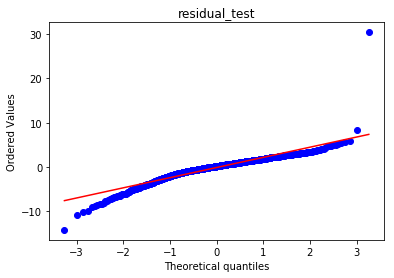

In [19]:
stats.probplot(residual_test, dist="norm", plot=pylab)
plt.title('residual_test')
pylab.show()

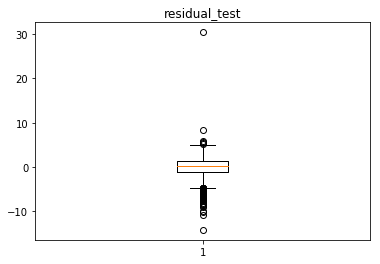

In [20]:
plt.figure()
plt.boxplot(residual_test)
plt.title('residual_test')
plt.show()

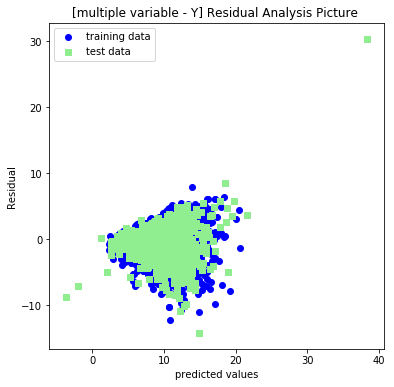

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(y_pred_train, residual_train , c = 'blue', marker = 'o', label = 'training data')
plt.scatter(y_pred_test, residual_test , c = 'lightgreen', marker = 's', label = 'test data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.title('[multiple variable - Y] Residual Analysis Picture ')
plt.legend(loc=2)
plt.show()


In [23]:
############### Feature selection: backward elimination
# ref: https://github.com/chekoduadarsh/Backward-Elimination-in-Python
def backwardElimination(x, y):
    SL = 0.05
    elimed_Variable = []
    numVars = len(np.array(x)[0])
    for i in range(0, numVars):
        regressor_OLS = smf.OLS(y, np.array(x)).fit()
        maxVar = max(regressor_OLS.pvalues)
        if maxVar > SL:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j] == maxVar):
                    x = np.delete(np.array(x), j, 1)
                                        
        else:
            elimed_Variable.append(i)
            pass
    regressor_OLS.summary()
    return elimed_Variable

In [24]:
selected_val = backwardElimination(X_train,y_train)

In [25]:
X_train_sel=X_train.iloc[:,selected_val]
X_test_sel=X_test.iloc[:,selected_val]

In [28]:
lm_sel = sm.OLS(y_train,X_train_sel)
lm_sel_tranded = lm_sel.fit()
lm_sel_tranded.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     8866.
Date:                Tue, 11 Sep 2018   Prob (F-statistic):               0.00
Time:                        13:50:22   Log-Likelihood:                -6456.0
No. Observations:                2923   AIC:                         1.293e+04
Df Residuals:                    2916   BIC:                         1.297e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Length             5.0016      2.018      2.478      0.013       1.044       8.959
Diameter           9.6070      2.673      3.594      0.000       4.365      14.849
Height            30.9671      2.639     11.734      0.000      25.792      36.142
Whole_weight       8.4171      0.887      9.492      0.000       6.678      10.156
Shucked_weight   -20.3371      1.005    -20.243      0.000     -22.307     -18.367
Viscera_weight   -11.2130      1.537     -7.294      0.000     -14.227      -8.199
Shell_weight       5.7619      1.371      4.203      0.000       3.074       8.450
==============================================================================
Omnibus:                      569.792   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1341.456
Skew:                           1.085   Prob(JB):                    5.09e-292
Kurtosis:                       5.511   Cond. No.                         105.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
y_sel_pred_train = lm_sel_tranded.predict(X_train_sel)
y_sel_pred_train

1116     8.664657
3944     5.479228
1845    12.184102
1209     8.498637
685     11.298465
545     16.003333
2759    16.745637
2635    10.609074
692     12.080498
1238    11.044345
3201    11.395868
3475    14.151520
1262     7.533362
1507     9.380198
1940     8.622036
806      9.585284
1879    10.805152
1681    10.071866
3902     7.785983
976      8.931688
2846     6.373749
1306     8.192694
2216    10.045156
915     10.108280
1567     9.762364
1705    12.988307
686      9.541538
329      8.057348
317      8.373641
1600     9.596505
          ...    
653     10.184578
644     10.691565
3397     9.782843
1614    15.300652
3031     5.625784
3819     8.489644
658      6.619003
1844     9.436343
1800     9.627566
1339    15.441529
1086     9.590386
3869     5.869492
2950     9.190529
2813     7.852567
1489     8.751220
3571    11.125703
1553    10.179730
4099    16.738514
1508     8.044674
637      8.805825
880      8.760088
3550     9.275180
3977    18.128426
926      9.228387
3743     5

In [33]:
# prediction y_test
y_sel_pred_test = lm_sel_tranded.predict(X_test_sel)
y_sel_pred_test

420     10.251791
4131    10.652365
2689     3.367511
607     12.384703
878     11.842573
2484     6.242308
3934     8.756854
1366     9.328258
58      10.346198
3658    12.437550
1354     9.674540
2629     9.014128
1239     8.934894
3856     4.920130
911     11.029932
3138    14.057076
2610    11.924574
2391     8.132128
3826     8.078505
4128     5.360002
1470    12.205611
3802     7.968796
1435     4.997098
2245     8.282627
1959     8.216294
1785     9.158949
1627     9.014730
3225     7.830566
3369    10.002135
1774    10.309575
          ...    
383      8.547258
1655     6.651310
2878     5.193153
2719    13.883117
854     10.218531
2220     9.594880
3592    18.616589
13       9.153761
2393    12.118611
2247     4.924791
1741    14.245339
2323    10.355288
82       5.367271
294      4.972191
1841    14.320801
1677    11.037924
65       9.821279
3917     4.633788
2398     7.842962
721      9.973510
4019     9.255109
2791    12.685744
1259     9.694362
680      8.066832
609     10

In [38]:
mse_sel_train = mean_squared_error(y_train, y_sel_pred_train)
mse_sel_test = mean_squared_error(y_test, y_sel_pred_test)
print("mse_sel_train: %.2f, mse_sel_test: %.2f"
      %(mse_sel_train,mse_sel_test))

mse_sel_train: 4.85, mse_sel_test: 5.98
